## Linear Regression

### Import dependent packages.

In [14]:
from sklearn.linear_model import LinearRegression # Import the linear regression model
import matplotlib.pyplot as plt # The plotting library
import numpy as np

### Build and visualize a house price dataset.

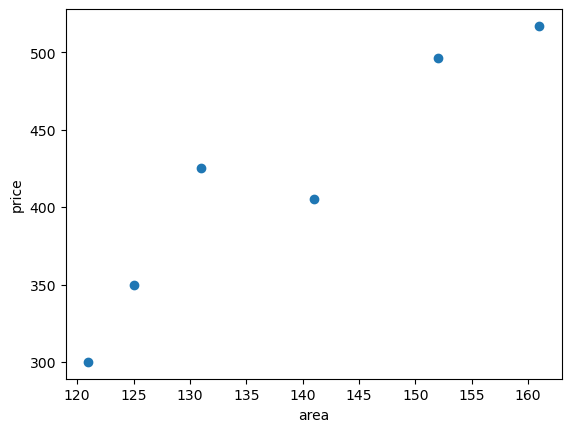

In [15]:
x = np.array([121, 125, 131, 141, 152, 161]).reshape(-1,1) # x denotes the house area as a feature.
y = np.array([300, 350, 425, 405,496,517]) # y denotes the house price.
plt.scatter(x,y)
plt.xlabel("area") # X axis indicates the area.
plt.ylabel("price") # Y axis indicates the price.
plt.show()

### Train the model.

In [16]:
lr = LinearRegression() # Encapsulate the linear regression model into an object.
lr.fit(x,y) # Train the model on the dataset.

LinearRegression()

### Visualize the model.

#### Input 1

In [17]:
w = lr.coef_# Slope of the model
b = lr.intercept_# Intercept of the model
print('Slope: ',w)
print('Intercept: ',b)

Slope:  [4.98467124]
Intercept:  -274.87696651875774


#### Input 2

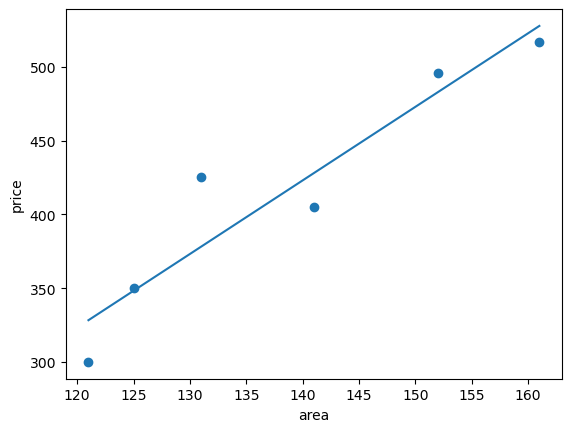

In [18]:
plt.scatter(x,y)
plt.xlabel("area") # X axis indicates the area.
plt.ylabel("price") # Y axis indicates the price.
plt.plot([x[0],x[-1]],[x[0]*w+b,x[-1]*w+b])

### Start a prediction task using the model.

In [19]:
testX = np.array([[130]])# A test sample with an area of 130
lr.predict(testX)

array([373.13029447])

## Linear Regression Implementation  (Expansion Experiment)

### 1. Import dependencies.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

### 2. Define the function for calculating gradients.

In [21]:
def generate_gradient(X, theta, y):
    sample_count = X.shape[0]
# Calculate the gradient based on the matrix 1/m ∑(((h(x^i)-y^i)) x_j^i)
    return (1./sample_count)*X.T.dot(X.dot(theta)-y)

### 3. Define the function for reading datasets.

In [22]:
def get_training_data(file_path):
    orig_data = np.loadtxt(file_path,skiprows=1) # Ignore the title in the first row of the dataset.
    cols = orig_data.shape[1]
    return (orig_data, orig_data[:, :cols - 1], orig_data[:, cols-1:])

### 4. Define the function for initializing parameters.

In [23]:
# Initialize the θ array.
def init_theta(feature_count):
    return np.ones(feature_count).reshape(feature_count, 1)

### 5. Define the function for implementing gradient descent.

In [24]:
def gradient_descending(X, y, theta, alpha):
  Jthetas= [] # Record the change trend of the cost function J(θ) to confirm the gradient descent is correct.
# Calculate the loss function, which is equal to the square of the difference between the actual value and the predicted value: (y^i-h(x^i))^2
  Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
  index = 0
  gradient = generate_gradient(X, theta, y) # Calculate the gradient.
  while not np.all(np.absolute(gradient) <= 1e-5): # End the calculation when the gradient is less than 0.00001.
    theta = theta - alpha * gradient
    gradient = generate_gradient(X, theta, y) # Calculate the new gradient.
    # Calculate the loss function, which is equal to the square of the difference between the actual value and the predicted value: (y^i-h(x^i))^2
    Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
  if (index+1) % 10 == 0:
    Jthetas.append((index, Jtheta[0])) # Record the result every 10 calculations.
    index += 1
  return theta,Jthetas

### 6. Define the function for visualizing the change curve of the loss function.

In [65]:
def showJTheta(diff_value):
  p_x = []
  p_y = []
  for (index, sum) in diff_value:
    p_x.append(index)
    p_y.append(sum)
  plt.plot(p_x, p_y, color='b')
  plt.xlabel('steps')
  plt.ylabel('loss funtion')
  plt.title('step - loss function curve')
  plt.show()

### 7. Define the function for visualizing data points and the fitted curve.

In [66]:
# Plot the actual data points and the fitted curve.
def showlinercurve(theta, sample_training_set):
    x, y = sample_training_set[:, 1], sample_training_set[:, 2]
    z = theta[0] + theta[1] * x
    plt.scatter(x, y, color='b', marker='x',label="sample data")
    plt.plot(x, z, 'r', color="r",label="regression curve")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('liner regression curve')
    plt.legend()
    plt.show()

### 8. Plot the final results.

w:3.0076279423997594 b:1.668677412281192


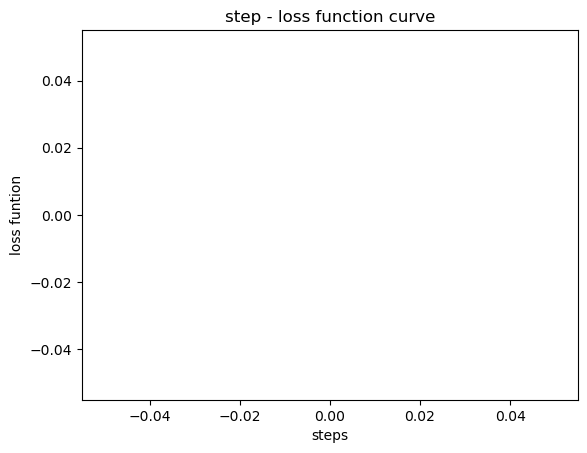

C:\Users\user\AppData\Local\Temp\ipykernel_21156\3948784968.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, z, 'r', color="r",label="regression curve")


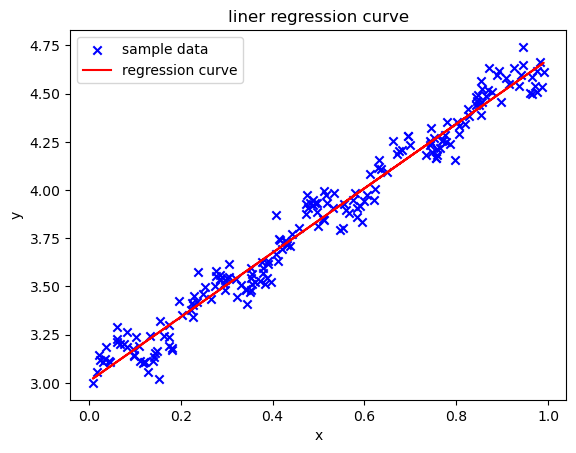

In [68]:
# Read the dataset.
training_data_include_y, training_x, y = get_training_data("lr2_data.txt")
# Obtain the numbers of samples and features, respectively.
sample_count, feature_count = training_x.shape
# Define the learning step α.
alpha = 0.01
# Initialize θ.
theta = init_theta(feature_count)
# Obtain the final parameter θ and cost.
result_theta,Jthetas = gradient_descending(training_x, y, theta, alpha)
# Display the parameter.
print("w:{}".format(result_theta[0][0]),"b:{}".format(result_theta[1][0]))
showJTheta(Jthetas)
showlinercurve(result_theta, training_data_include_y)

## Logistic Regression

### 1. Import dependencies.

In [1]:
# Import StandardScaler from sklearn.preprocessing.
from sklearn.preprocessing import StandardScaler
# Import LogisticRegression from sklearn.linear_model.
from sklearn.linear_model import LogisticRegression

### 2. Define the dataset.

In [2]:
# Each item in X denotes the rent and area.
# y indicates whether to rent the room (0: no; 1: yes).
X=[[2200,15],[2750,20],[5000,40],[4000,20],[3300,20],[2000,10],[2500,12],[12000,80],
[2880,10],[2300,15],[1500,10],[3000,8],[2000,14],[2000,10],[2150,8],[3400,20],
[5000,20],[4000,10],[3300,15],[2000,12],[2500,14],[10000,100],[3150,10],
[2950,15],[1500,5],[3000,18],[8000,12],[2220,14],[6000,100],[3050,10]
]
y=[1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0,1,1,1,0,1,0,1,0,1,1,0]

### 3. Preprocess data.

In [3]:
ss = StandardScaler()
X_train = ss.fit_transform(X)
print(X_train)

[[-0.60583897 -0.29313058]
 [-0.37682768 -0.09050576]
 [ 0.56003671  0.71999355]
 [ 0.14365254 -0.09050576]
 [-0.14781638 -0.09050576]
 [-0.68911581 -0.49575541]
 [-0.48092372 -0.41470548]
 [ 3.47472592  2.34099218]
 [-0.32269773 -0.49575541]
 [-0.56420055 -0.29313058]
 [-0.89730789 -0.49575541]
 [-0.27273163 -0.57680534]
 [-0.68911581 -0.33365555]
 [-0.68911581 -0.49575541]
 [-0.62665818 -0.57680534]
 [-0.10617796 -0.09050576]
 [ 0.56003671 -0.09050576]
 [ 0.14365254 -0.49575541]
 [-0.14781638 -0.29313058]
 [-0.68911581 -0.41470548]
 [-0.48092372 -0.33365555]
 [ 2.64195758  3.15149149]
 [-0.21027401 -0.49575541]
 [-0.29355084 -0.29313058]
 [-0.89730789 -0.69838024]
 [-0.27273163 -0.17155569]
 [ 1.80918923 -0.41470548]
 [-0.59751129 -0.33365555]
 [ 0.97642089  3.15149149]
 [-0.25191242 -0.49575541]]


### 4. Fit the data.

In [4]:
# Use the fit method of LogisticRegression to train model parameters.
lr = LogisticRegression()
lr.fit(X_train, y)

LogisticRegression()

### 5. Predict the data.

In [5]:
testX = [[2000,8]]
X_test = ss.transform(testX)
print("Value to be predicted: ",X_test)
label = lr.predict(X_test)
print("predicted label = ", label)
# Output the predicted probability.
prob = lr.predict_proba(X_test)
print("probability = ",prob)

Value to be predicted:  [[-0.68911581 -0.57680534]]
predicted label =  [1]
probability =  [[0.41886952 0.58113048]]


## Decision Tree

### 1. Import dependencies.

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus